Given a data = [[1, 100], [2, 85], [3, 70], [4, 45], [5, 30]]
- Fit a linear model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
salary = pd.read_csv('Datasets/Salary.csv', )

In [3]:
salary.head()

,YrExp,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
X = salary[['YrExp']]
y = salary['Salary']

initial_theta = np.zeros(X.shape[1]+1)

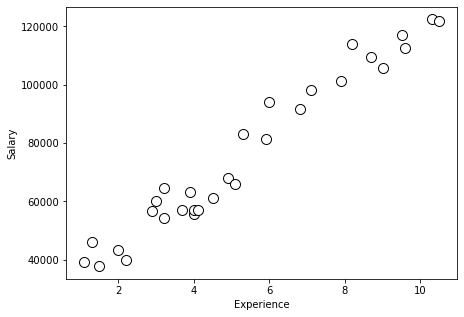

In [5]:
plt.figure(figsize=(7, 5))
plt.scatter(X, y, s=100, facecolor='w', edgecolor='k')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

In [6]:
X = X/1
y = y/10000

In [7]:
class LinearRegression:
    def __init__(self, lr = 0.01, n_iters = 100):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # initial parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent 
        for _ in range(self.n_iters):
            y_update = np.dot(X, self.weights) + self.bias
            resid = y_update - y
            
            # compute gradients
            dw = np.dot(X.T, resid)/n_samples 
            db = np.sum(resid)/n_samples 

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
 

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

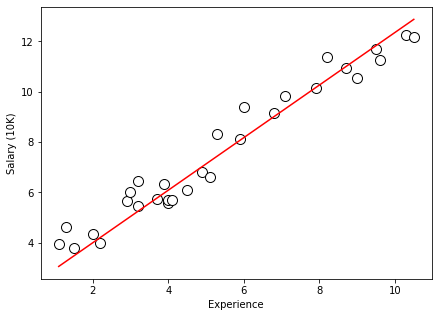

In [12]:
model = LinearRegression(n_iters=200, lr=0.03)

model.fit(X, y)
y_pred = model.predict(X)


plt.figure(figsize=(7, 5))
plt.scatter(X, y, s=100, facecolor='w', edgecolor='k')
plt.plot(X, y_pred, 'r')
plt.xlabel('Experience')
plt.ylabel('Salary (10K)')
plt.show()